# IMPLEMENTATION OF DATA PREPROCESSING ON TITANIC DATASET

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data in Pandas

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Celebal Technologies/Week - 5/train.csv')

In [42]:
df.shape

(891, 12)

In [43]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.05,NaN,S
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,C46,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.00,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
df.duplicated().sum()

0

<Axes: xlabel='Survived', ylabel='count'>

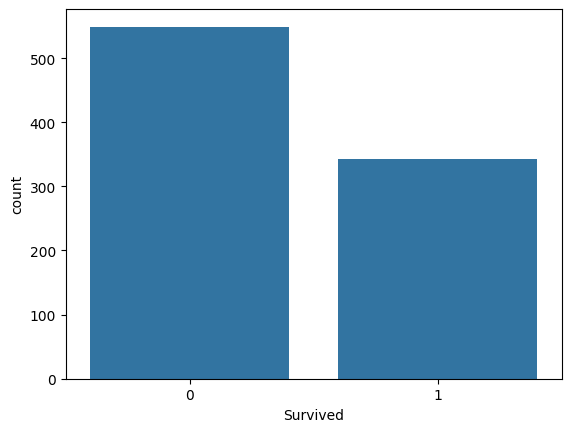

In [48]:
sns.countplot(x='Survived', data = df)

<Axes: xlabel='Survived'>

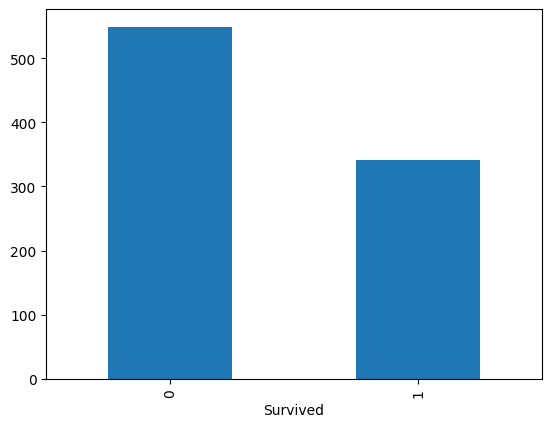

In [49]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

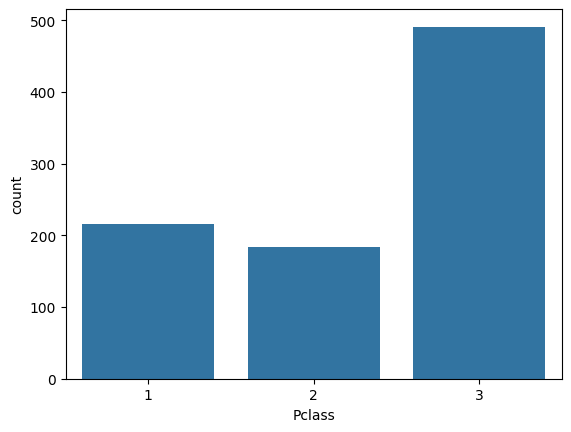

In [50]:
sns.countplot(x='Pclass', data = df)

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

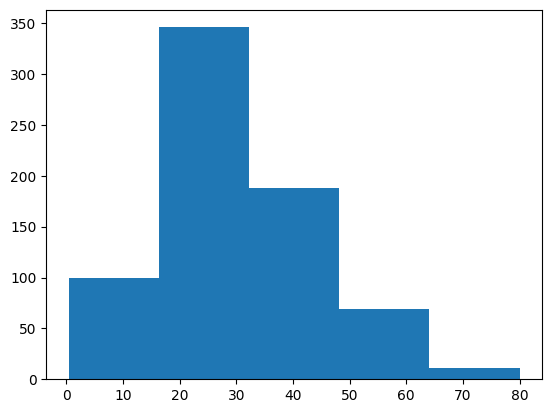

In [51]:
plt.hist(df["Age"], bins = 5)

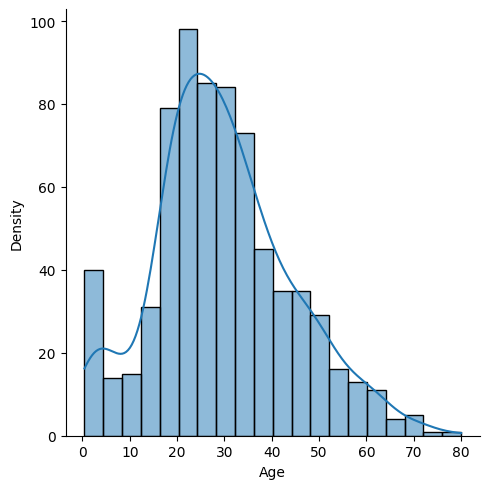

In [52]:
sns.displot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<Axes: ylabel='Age'>

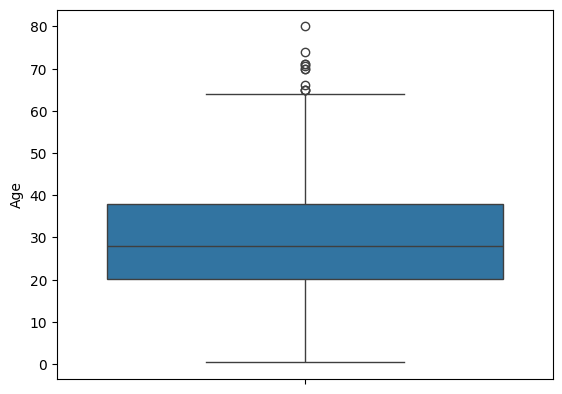

In [53]:
sns.boxplot(df['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

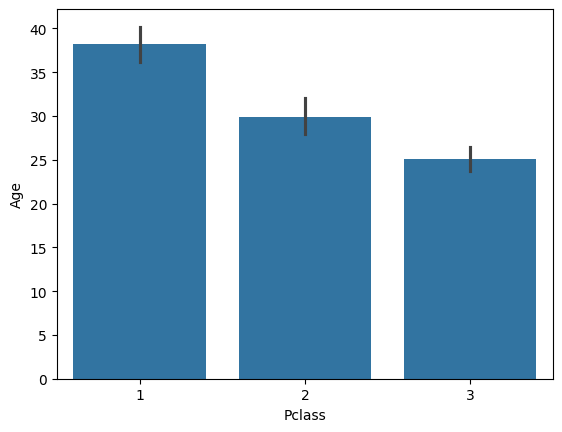

In [54]:
sns.barplot(x=df['Pclass'],y=df['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

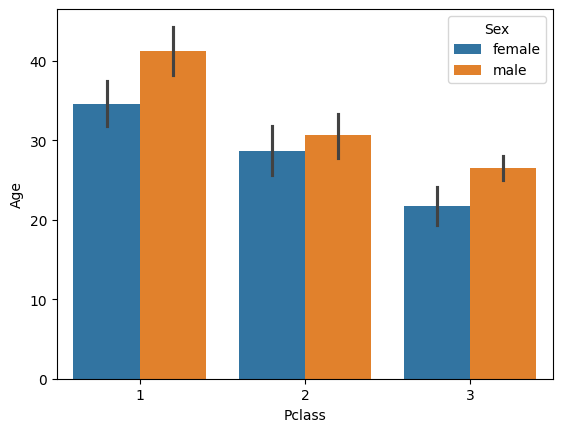

In [55]:
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Sex'])

In [56]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

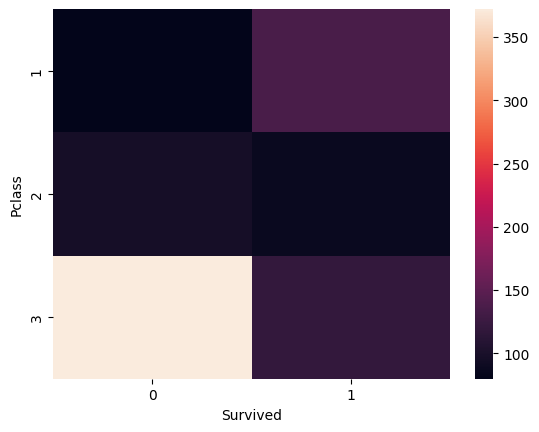

In [57]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

In [58]:
survival_rates = (df.groupby('Pclass')['Survived'].mean() * 100)

In [59]:
survival_rates

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

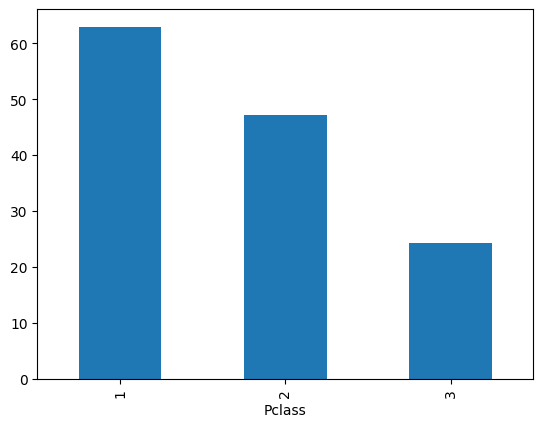

In [60]:
survival_rates.plot(kind='bar')

In [61]:
(df.groupby('Sex')['Survived'].mean() * 100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [62]:
pd.crosstab(df['SibSp'], df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


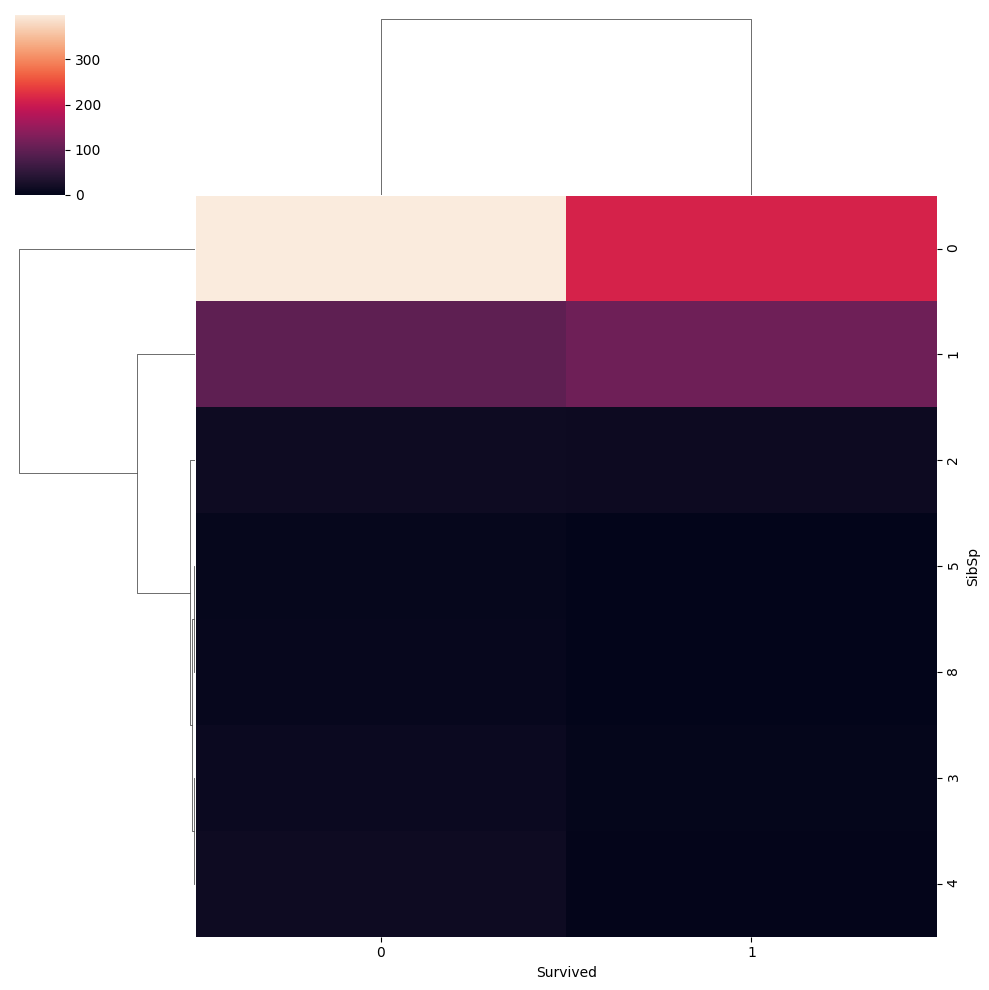

In [63]:
sns.clustermap(pd.crosstab(df['SibSp'], df['Survived']))

### Dropping Columns which are Not Useful

In [64]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Dropping Rows having Missing Values

In [66]:
df1 = df.dropna()

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


### Problem with Dropping Rows having Missing Values

In [68]:
# Creating Dummy Variables
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [69]:
titanic_dummies = pd.concat(dummies, axis=1)

In [70]:
df = pd.concat((df,titanic_dummies), axis=1)

In [71]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   1            891 non-null    bool   
 7   2            891 non-null    bool   
 8   3            891 non-null    bool   
 9   female       891 non-null    bool   
 10  male         891 non-null    bool   
 11  C            891 non-null    bool   
 12  Q            891 non-null    bool   
 13  S            891 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 48.9 KB


### Taking Care of Missing Data

In [73]:
df['Age'] = df['Age'].interpolate()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   1            891 non-null    bool   
 7   2            891 non-null    bool   
 8   3            891 non-null    bool   
 9   female       891 non-null    bool   
 10  male         891 non-null    bool   
 11  C            891 non-null    bool   
 12  Q            891 non-null    bool   
 13  S            891 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 48.9 KB


### Converting the Dataframe to NumPy

In [75]:
X = df.values
y = df['Survived'].values

In [76]:
X = np.delete(X, 1, axis=1)

### Dividing Data Set into Training Set and Test Set

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)